In [52]:
import torch
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from torch import nn
from torch import optim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

torch.manual_seed(69420)

df = sns.load_dataset('penguins')
df = df.dropna()
df = df[df['species'] != 'Gentoo']
df['sex'] = df['sex'].replace(['Male', 'Female'], [0, 1])
df['island'] = df['island'].replace(['Torgersen', 'Biscoe', 'Dream'], [0, 1, 2])

species_vectorizer = CountVectorizer()
species = species_vectorizer.fit_transform(df['species'].to_numpy())

df = df.drop(['island', 'sex'], axis=1)
df = df.loc[:, df.columns != 'species']

species = species.toarray()

X = torch.tensor(df.to_numpy()).float()
y = torch.tensor(species).float()

X_train, X_test, y_train, y_test = train_test_split(X / 2, y, random_state=42069)
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
215,55.8,19.8,207.0,4000.0
216,43.5,18.1,202.0,3400.0
217,49.6,18.2,193.0,3775.0
218,50.8,19.0,210.0,4100.0


In [49]:
class NikeNet(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        
        hidden_layer = 64
        
        self.seq = nn.Sequential(
            nn.Linear(in_features, hidden_layer),
            nn.ReLU(),
            nn.Linear(hidden_layer, hidden_layer),
            nn.ReLU(),
            nn.Linear(hidden_layer, out_features),
        )
        
    def forward(self, x):
        return self.seq(x)
    
model = NikeNet(4, 2)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)
total_loss = []

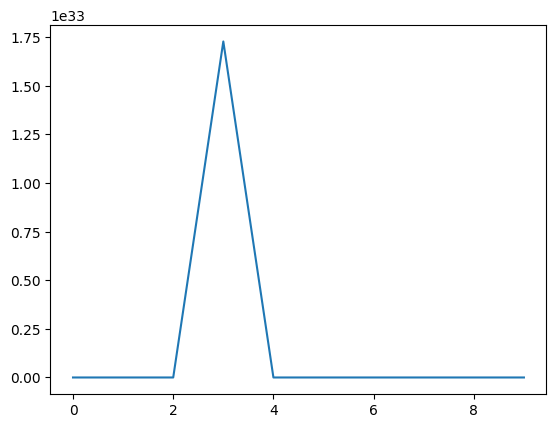

In [50]:
model.train()

for epoch in range(10):
    optimizer.zero_grad()
    
    preds = model(X_train)
    loss = criterion(preds, y_train)
    
    loss.backward()
    optimizer.step()
    
    total_loss.append(loss.item())
    
plt.plot(total_loss)

In [51]:
model.eval()

with torch.no_grad():
    preds = model(X_test)
    
preds

tensor([[-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.3478e+13],
        [-4.7883e+13,  3.347